# Image noise removal using Auto encoders

As autoencoders can learn useful features we can train the network that eliminates noise

Example taken : MNIST data set 
   * Image data set of 28x28 => 784 features
   * Reduce the features from 784 to 25 and reconstruct the image back and analyse
   * In this example we can achieve feature reduction of around 97% (instead of 784 features we can take 25 features generated by encoder network)
   * Before sending the original images to autoencoder network add noise(gaussian) and try to fit with origianl data.
   * In this way, a noisy image can be reconstructed after removing tghe noise by autoencoder

Steps: 
   1. Load mnist dataset, scale the data to 0-1
   2. Introduce noise (gaussian) because the input images dont contain noise
   2. Encoder network : (ip image size 28x28 = 784) flatten -> 400 > 200 -> 100 -> 50 -> 25, relu activation
   3. Decoder netwrork : (ip size = 25) 50 -> 100 - > 200 -> 400 -> 784(o/p with sigmoid activatiom), except o/p layer - relu activation
   4. Construct autoencoder(enocder + decoder) and train 
       * with loss -> binary cross entropy (as we need to validate the i/p and o/p with yes or no)
       * optimizer -> SGD / adam
       * epochs -> 8
   5. Analyse reconstructed images. Can be validated on test data(unseen data) with noise added

## Load dataset

In [1]:
import matplotlib.pyplot as plt 

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 60k input images with size 28x28
x_train.shape

(60000, 28, 28)

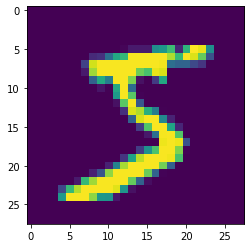

In [5]:
plt.imshow(x_train[0])
plt.show()

In [6]:
x_train[0].min()

0

In [7]:
x_train[0].max()

255

#### scale inut data

In [8]:
x_train = x_train/255
x_test = x_test/255

#### Add gaussian nise to one of the examples and see how it looks like

In [12]:
from tensorflow.keras.layers import GaussianNoise

In [13]:
noise_layer = GaussianNoise(0.2) # standard deviation

In [14]:
noisy_img = noise_layer(x_train[0], training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



SAMPLE EXAMPLE


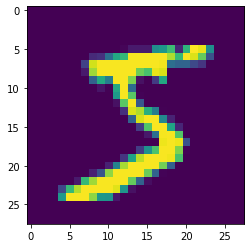

In [15]:
print("SAMPLE EXAMPLE")
plt.imshow(x_train[0])
plt.show()

NOISY EXAMPLE


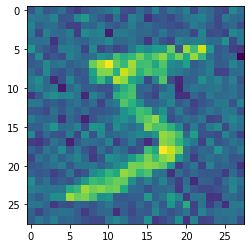

In [16]:
print("NOISY EXAMPLE")
plt.imshow(noisy_img)
plt.show()

## Build autoencoder 
* Add gaussian noise layer since input images are noise free

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GaussianNoise
import tensorflow as tf

#### Encoder network

In [21]:
encoder = Sequential()
encoder.add(Flatten())
#Addd noise to the input images
tf.random.set_seed(101) # optional for debugging purpose
encoder.add(GaussianNoise(stddev = 0.2)) # add noise to each input example
encoder.add(Dense(units = 400, input_shape = x_train[0].shape , activation = 'relu'))
encoder.add(Dense(units = 200, activation = 'relu'))
encoder.add(Dense(units = 100, activation = 'relu'))
encoder.add(Dense(units = 50, activation = 'relu'))
encoder.add(Dense(units = 25, activation = 'relu'))

#### Decoder network

In [22]:
decoder = Sequential()
decoder.add(Dense(units = 50, input_shape = [25] , activation = 'relu'))
decoder.add(Dense(units = 100, activation = 'relu'))
decoder.add(Dense(units = 200, activation = 'relu'))
decoder.add(Dense(units = 400, activation = 'relu'))
decoder.add(Dense(units = 784, activation = 'sigmoid')) 
decoder.add(Reshape(x_train[0].shape))

#### Create autoencoder

In [23]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#we can use test data as vaidation since we have already have otherwise no need to use validation data
autoencoder.fit(x_train, x_train, validation_data = [x_test, x_test], epochs = 8)

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 28s 462us/sample - loss: 0.1725 - accuracy: 0.8008 - val_loss: 0.1372 - val_accuracy: 0.8040
Epoch 2/8
60000/60000 [==============================] - 27s 447us/sample - loss: 0.1334 - accuracy: 0.8072 - val_loss: 0.1248 - val_accuracy: 0.8073
Epoch 3/8
60000/60000 [==============================] - 26s 436us/sample - loss: 0.1233 - accuracy: 0.8091 - val_loss: 0.1159 - val_accuracy: 0.8099
Epoch 4/8
60000/60000 [==============================] - 25s 421us/sample - loss: 0.1171 - accuracy: 0.8102 - val_loss: 0.1128 - val_accuracy: 0.8095
Epoch 5/8
60000/60000 [==============================] - 27s 444us/sample - loss: 0.1136 - accuracy: 0.8108 - val_loss: 0.1086 - val_accuracy: 0.8102ss: 0.1136 - accu
Epoch 6/8
60000/60000 [==============================] - 25s 422us/sample - loss: 0.1109 - accuracy: 0.8112 - val_loss: 0.1061 - val_accuracy: 0.8104
Epoch 7/8
60000/60000 [==========

#### Recostruct an image and see how the autoencoder network performed on noisy image

#### Origianl image with out noise

In [24]:
ip = x_test[0].reshape(1, 28, 28)

ORIGINAL IMAGE - WITH OUT NOISE


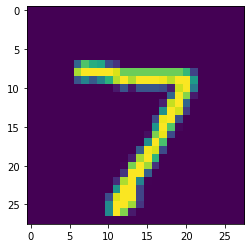

In [25]:
print("ORIGINAL IMAGE - WITH OUT NOISE")
plt.imshow(ip[0])
plt.show()

#### Noisy image as input

INPUT IMAGE FOR MODEL - NOISY IMAGE


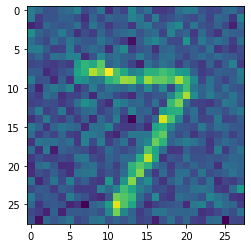

In [26]:
print("INPUT IMAGE FOR MODEL - NOISY IMAGE")
ip_noisy = noise_layer(ip, training = True)
plt.imshow(ip_noisy[0])
plt.show()

#### Denoised image
* Note: Model itself adds another layer of noise on top given image(noisy image / noise free image) 

OUTPUT IMAGE FROM MODEL - AFTER NOISE REMOVAL


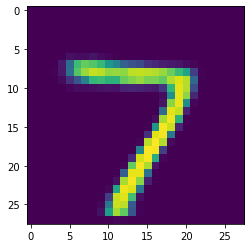

In [27]:
op = autoencoder.predict(ip_noisy)
print("OUTPUT IMAGE FROM MODEL - AFTER NOISE REMOVAL")
plt.imshow(op[0])
plt.show()

#### Good bye !!